# VGG16 model

### VGG16 with only 2 categories (Benign and Malign)

## Get packages

In [1]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm
import albumentations as A 
import cv2

from skimage.io import imread
from skimage.io import imshow
from skimage.util import crop
from skimage.transform import resize
import matplotlib.pyplot as plt


from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers.legacy import Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras import models
from keras.preprocessing import image

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
     

## Paths

In [2]:
TRAIN_PATH = 'archive/classification/simple/train'
TEST_PATH = 'archive/classification/simple/test'
VALID_PATH = 'archive/classification/simple/validate'

In [3]:
input_size = (3,224,224)

## Load and Prepare Images

In [32]:
from keras.preprocessing.image import ImageDataGenerator

# train_batchsize = 4
# valid_batchsize = 4

train_datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=0.6)

validation_datagen = ImageDataGenerator()
                                  

train_generator = train_datagen.flow_from_directory(
        TRAIN_PATH,  
        shuffle=True,
#          batch_size=train_batchsize,
        target_size=input_size[1:],
        class_mode='categorical')  

validation_generator = validation_datagen.flow_from_directory(
        VALID_PATH,  
        target_size=input_size[1:],
        shuffle=True,
#          batch_size=valid_batchsize,
        class_mode='categorical')

Found 520 images belonging to 2 classes.
Found 174 images belonging to 2 classes.


## Make the model

In [61]:
# Define the model as a sequential sequence of layers
model = Sequential()

# Define convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Define classification layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Print a summary of the model architecture
model.summary()


# Compile the model
model.compile(
#                loss=keras.losses.CategoricalCrossentropy(), 
              loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.legacy.Adamax(), 
              metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_156 (Conv2D)         (None, 224, 224, 64)      1792      
                                                                 
 conv2d_157 (Conv2D)         (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_158 (Conv2D)         (None, 112, 112, 128)     73856     
                                                                 
 conv2d_159 (Conv2D)         (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                               

In [12]:
# To show the model arhitecture
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model
model = VGG16()
plot_model(model, to_file='vgg.png')

ModuleNotFoundError: No module named 'keras.utils.vis_utils'

## Train the model

In [64]:
# Saving the best result
checkpoiter = tf.keras.callbacks.ModelCheckpoint('model_vgg16_aug_simple.h5', verbose=1, save_best_only=True)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs'),
    checkpoiter

]
# Train
results = model.fit(train_generator, 
                    validation_data=validation_generator, 
#                      validation_split=0.1, 
                    batch_size=64, 
                    epochs=25, 
                    callbacks=callbacks,
#                     steps_per_epoch=10
                   )

Epoch 1/25
17/17 [==============================] - ETA: 0s - loss: 0.4096 - accuracy: 0.8269 
Epoch 1: val_loss improved from inf to 0.45702, saving model to model_vgg16_aug_simple.h5
17/17 [==============================] - 288s 17s/step - loss: 0.4096 - accuracy: 0.8269 - val_loss: 0.4570 - val_accuracy: 0.7816
Epoch 2/25
17/17 [==============================] - ETA: 0s - loss: 0.4140 - accuracy: 0.8250 
Epoch 2: val_loss did not improve from 0.45702
17/17 [==============================] - 317s 19s/step - loss: 0.4140 - accuracy: 0.8250 - val_loss: 0.4651 - val_accuracy: 0.7759
Epoch 3/25
17/17 [==============================] - ETA: 0s - loss: 0.4120 - accuracy: 0.8212 
Epoch 3: val_loss did not improve from 0.45702
17/17 [==============================] - 301s 18s/step - loss: 0.4120 - accuracy: 0.8212 - val_loss: 0.4618 - val_accuracy: 0.7874
Epoch 4/25
17/17 [==============================] - ETA: 0s - loss: 0.4021 - accuracy: 0.8346 
Epoch 4: val_loss improved from 0.45702 to 

## Results

In [65]:
print('Accuracy Score = ',np.max(results.history['val_accuracy']))
print('Loss Score = ',np.min(results.history['val_loss']))

Accuracy Score =  0.8045976758003235
Loss Score =  0.4397170841693878


### During training

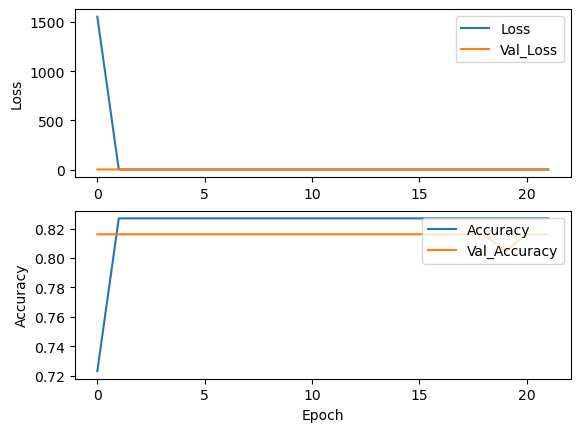

In [32]:
plt.figure()
plt.subplot(211)
loss_train_curve = results.history["loss"]
loss_val_curve = results.history["val_loss"]
plt.plot(loss_train_curve, label = "Loss")
plt.plot(loss_val_curve, label = "Val_Loss")
plt.legend(loc = 'upper right')
plt.ylabel("Loss")


plt.subplot(212)
acc_train_curve = results.history["accuracy"]
acc_val_curve = results.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Accuracy")
plt.plot(acc_val_curve, label = "Val_Accuracy")
plt.legend(loc = 'upper right')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [50]:
train_generator.class_indices

{'benign': 0, 'malign': 1}

## Test the model

In [ ]:
# Predict Classes

# test_batch_size = 1

# num_of_test_samples = 1

target_names = list(train_generator.class_indices.keys())
print(target_names)
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=input_size[1:],
#     batch_size=test_batchsize,
    shuffle=True,
class_mode='categorical')

In [ ]:
# Get ground-truth classes 

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  

### Make prediction

1/1 [==============================] - 2s 2s/step


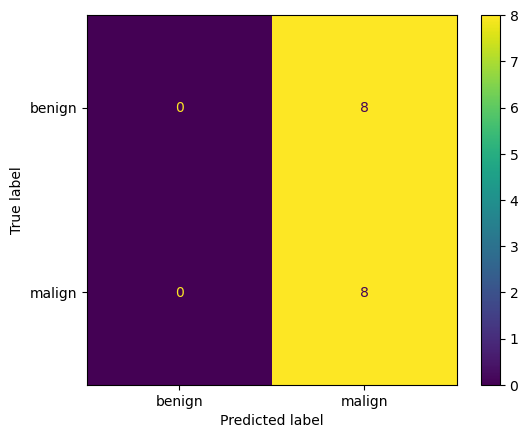

In [47]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
# print(validation_generator.batch_size)

predictions = model.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
# Y_pred = model.predict(test_generator, num_of_test_samples // test_batch_size+1)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot()
plt.grid(False)
plt.show()